# Wine dataset

Jeden z klasycznych datasetów dotyczący jakości różnych gatunków wina. Może zostać użyty do klasyfikacji wieloklasowej (zmienna *quality*) ale również do regresji.

## Regresja liniowa

***Zadanie 1***

Wczytaj dane z pliku `data/winedataset.csv` i wytrenuj model regresji liniowej do oceny zawartości alkoholu w winie. Użyj cech *fixed acidity*, *residual sugar* oraz *density*. Porównaj `y_test` z `y_pred` i policz średnią odchyłkę predykcji.

---
(czas: 10 min.)

In [1]:
import pandas as pd

df = pd.read_csv("data/winedataset.csv").dropna()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
from sklearn.model_selection import train_test_split

X, y = df[["fixed acidity", "residual sugar", "density"]], df["alcohol"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred) * 100

5.685651705890903

***Zadanie 2***

Sprawdź jakie są średnia oraz odchylenie standardowe w kolumnie `alcohol`. Następnie - zakładając że rozkład tej zmiennej jest normalny - wygeneruj **losową** predykcję zawartości alkoholu czyli wektor o takiej długości ile wierszy mają dane testowe ale pochodzący z rozkładu normalnego (użyj funkcji `np.random.normal()`).

Następnie policz średnią odchyłkę nowej "predykcji" względem wartości testowych. To nam pozwoli określić na ile nasza predykcja jest lepsza od losowej.

---
(czas: 7 min.)

In [4]:
mu, sigma = np.mean(df["alcohol"]), np.std(df["alcohol"])
print(f'mu = {mu},\nsigma = {sigma}')

mu = 10.492825313318583,
sigma = 1.1930359316719947


In [5]:
y_pred_r = np.random.normal(loc=mu, scale=sigma, size=len(y_test))
mean_absolute_percentage_error(y_test, y_pred_r) * 100

13.029822107165423

***Zadanie 3***

Wytrenuj model ponownie. Użyj do tego wszystkich cech numerycznych. Wyodrębnij je za pomocą funkcji `select_dtypes` z biblioteki pandas, która wyciąga z df-a wszystkie kolumny określonych typów.

---
(czas: 5 min.)

In [6]:
X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred2) * 100

3.788472065201666

## Ewaluacja modelu

***Zadanie 1***

Dla obu powyższych modeli (zad. 1, zad. 3) dokonaj ewaluacji graficznej - zarówno w postaci wykresu wartości prognozowanych względem rzeczywistych jak i residuów względem wartości prognozowanej.

---
(czas: 15 min.)

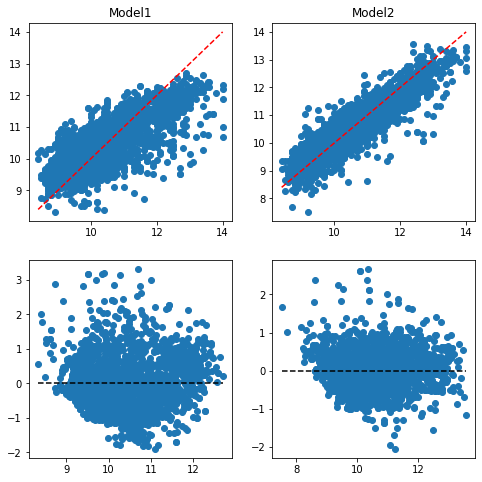

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--');
plt.title('Model1')

plt.subplot(222)
plt.scatter(y_test, y_pred2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--');
plt.title('Model2')

plt.subplot(223)
plt.scatter(y_pred, y_test - y_pred)
plt.plot([min(y_pred), max(y_pred)], [0, 0], 'k--')

plt.subplot(224)
plt.scatter(y_pred2, y_test - y_pred2)
plt.plot([min(y_pred2), max(y_pred2)], [0, 0], 'k--')

***Zadanie 2***

Policz wszystkie poznane metryki błędu dla powyżej wytrenowanych modeli. Napisz w tym celu funkcję, która przyjmuje `y_test` oraz `y_pred` i zwraca jednowierszowy dataframe, którego kolumny będą odnosić się do poszczególnych metryk a jego wartości to wyliczone wartości tych metryk.

---
(czas: 12 min.)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def calculate_metrics(y_test, y_pred):

    return pd.DataFrame({'MAE': mean_absolute_error(y_test, y_pred),
                         'MSE': mean_squared_error(y_test, y_pred),
                         'MAPE': mean_absolute_percentage_error(y_test, y_pred),
                         'R2': r2_score(y_test, y_pred)},
                       index=['metric_value'])
    
calculate_metrics(y_test, y_pred)

,MAE,MSE,MAPE,R2
metric_value,0.601881,0.598338,0.056857,0.593234


In [10]:
calculate_metrics(y_test, y_pred2)

,MAE,MSE,MAPE,R2
metric_value,0.397869,0.265854,0.037885,0.819265


## Feature engineering

***Zadanie 1***

Napisz funkcję, która przyjmuje dane uczące i testowe, trenuje model i zwraca df z metrykami z poprzedniego zadania. Następnie utwórz kilka kombinacji istniejących zmiennych i zobacz czy ich dodanie wpływa na uzyskane wyniki. Na koniec usuń z danych nowe kolumny.

---
(czas: 16 min.)

In [11]:
def train_predict_and_evaluate(X_train, X_test, y_train, y_test):
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return calculate_metrics(y_test, y_pred)

In [12]:
df = pd.read_csv("data/winedataset.csv").dropna()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]

train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.397869,0.265854,0.037885,0.819265


In [14]:
# model z dodaną kolumną

df["acidity"] = df["fixed acidity"] + df["volatile acidity"]
X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]

train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.397869,0.265854,0.037885,0.819265


In [15]:
# model z dodaną kolejną kolumną

df["sulfur"] = df["free sulfur dioxide"] / df["total sulfur dioxide"]
X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]

train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.392696,0.262382,0.037408,0.821626


In [16]:
df = df.drop(["acidity", "sulfur"], axis=1)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Preprocessing cz. 1

***Zadanie 1***

Wykonaj scaling kolumny `total sulfur dioxide` zarówno poprzez normalizację jak i standaryzację. Sprawdź czy wpłynie to na wynik predykcji

---
(czas: 16 min.)

In [17]:
df = pd.read_csv("data/winedataset.csv").dropna()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv("data/winedataset.csv").dropna()
df["total sulfur dioxide"] = MinMaxScaler().fit_transform(df[["total sulfur dioxide"]])

X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]
train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.397869,0.265854,0.037885,0.819265


In [19]:
df = pd.read_csv("data/winedataset.csv").dropna()
df["total sulfur dioxide"] = StandardScaler().fit_transform(df[["total sulfur dioxide"]])

X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]
train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.397869,0.265854,0.037885,0.819265


***Zadanie 2***

Wykonaj normalizację na wszystkich cechach i sprawdź jak wpłynie to na wyniki zwracane przez model. Następnie zrób to samo dla standaryzacji

---
(czas: 16 min.)

In [20]:
df = pd.read_csv("data/winedataset.csv").dropna()
df.iloc[:, 1:] = MinMaxScaler().fit_transform(df.iloc[:, 1:])

X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]
train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.057662,0.005584,0.20042,0.819265


In [21]:
df = pd.read_csv("data/winedataset.csv").dropna()
df.iloc[:, 1:] = StandardScaler().fit_transform(df.iloc[:, 1:])

X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]
train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.333493,0.186783,2.623686,0.819265


## Preprocessing cz. 2

***Zadanie 1***

Sprawdź w których kolumnach (i wierszach) występują wartości odstające. Wybierz jedną z dwóch poznanych metod. Następnie usuń outliery i sprawdź czy wpłynęło to na wynik

---

(czas: 6 min.)

In [22]:
from scipy import stats

df = pd.read_csv("data/winedataset.csv").dropna()

df_num = df.select_dtypes(["int", "float"])
df_num = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]

X, y = df_num.drop(["alcohol"], axis=1), df_num["alcohol"]
train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.366834,0.237217,0.034935,0.841538


***Zadanie 2***

Wczytaj dane uwzględniając kolumnę `type`. Wykonaj one hot encoding na `type` i wytrenuj model. Sprawdź czy wpłynęło to na wynik predykcji

---
(czas: 10 min.)

In [23]:
df = pd.read_csv("data/winedataset.csv").dropna()

df_num = pd.concat([pd.get_dummies(df["type"], drop_first=True), df.drop("type", axis=1)], axis=1)
df_num

,white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
X, y = df_num.drop(["alcohol"], axis=1), df_num["alcohol"]
train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.355361,0.221643,0.033998,0.849322


## Regresja wielomianowa
***Zadanie 1***

Za pomocą funkcji `pd.DataFrame.corr()` sprawdź z którą cechą najlepiej koreluje nasz target. Następnie korzystając z tej zmiennej oraz jej kwadratu dokonaj predykcji. Dokonaj ewaluacji a następnie sprawdź czy dodanie kolejnego członu wielomianu poprawi wynik.

---
(czas: 14 min.)

In [25]:
np.abs(pd.DataFrame.corr(df).alcohol).sort_values(ascending=False)

/tmp/ipykernel_185/2359297401.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.abs(pd.DataFrame.corr(df).alcohol).sort_values(ascending=False)


alcohol                 1.000000
density                 0.687432
quality                 0.444637
residual sugar          0.359132
total sulfur dioxide    0.264385
chlorides               0.257664
free sulfur dioxide     0.179477
pH                      0.120473
fixed acidity           0.096190
volatile acidity        0.039528
citric acid             0.010056
sulphates               0.004116
Name: alcohol, dtype: float64

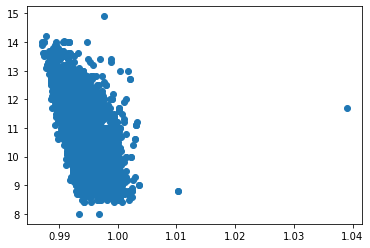

In [26]:
X, y = df["density"], df["alcohol"]
plt.scatter(X, y, label='Obserwacje');

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(X.values.reshape(-1, 1))

train_predict_and_evaluate(*train_test_split(poly_features, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.680647,0.744488,0.064241,0.493878


In [28]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.values.reshape(-1, 1))

train_predict_and_evaluate(*train_test_split(poly_features, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.652021,0.698304,0.061597,0.525274


In [29]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X.values.reshape(-1, 1))

train_predict_and_evaluate(*train_test_split(poly_features, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.632856,0.659701,0.059869,0.551518


## Overfitting

***Zadanie 1***

Wykonaj predykcję na wszystkich oryginalnych kolumnach (łącznie z `type` po one hot encoding) i sprawdź wynik metryki `mean_absolute_error`. Następnie zrób to samo ale korzystając z cross-walidacji. Najpierw zrób to za pomocą `cross_val_score` a następnie używając `KFold`

---
(czas: 12 min.)

In [30]:
df = pd.read_csv("data/winedataset.csv").dropna()
df_num = pd.concat([pd.get_dummies(df["type"], drop_first=True), df.drop("type", axis=1)], axis=1)

X, y = df_num.drop(["alcohol"], axis=1), df_num["alcohol"]
train_predict_and_evaluate(*train_test_split(X, y, test_size=0.33, random_state=42))

,MAE,MSE,MAPE,R2
metric_value,0.355361,0.221643,0.033998,0.849322


In [31]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
print(f'MAE: {scores.mean()}')

MAE: 0.36073612936600136


In [32]:
from sklearn.model_selection import KFold

model = LinearRegression()

cv = KFold(n_splits=10, shuffle=True)

y_test_all = []
y_pred_all = []
scores = []

for train_idx, test_idx in cv.split(X):
    
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred = model.predict(X.iloc[test_idx])
    
    y_test_all.extend(y.iloc[test_idx])
    y_pred_all.extend(y_pred)
    
    score = mean_absolute_error(y.iloc[test_idx], y_pred)
    scores.append(score)
    
print(f'MAE: {np.mean(scores)}')

MAE: 0.35013685289004615


## Regularyzacja

***Zadanie 1***

Na podstawie zbioru `winedataset` porównaj podstawowy model regresji liniowej z regresją Ridge, Lasso oraz ElasticNet. Wykorzystaj dowolną metrykę.

---
(czas: 10 min.)

In [33]:
df = pd.read_csv("data/winedataset.csv").dropna()

X, y = df[["fixed acidity", "residual sugar", "density"]], df["alcohol"]
# X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# regresja liniowa

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(np.mean(np.abs(model.coef_)))
calculate_metrics(y_test, y_pred)

128.64183937060614


,MAE,MSE,MAPE,R2
metric_value,0.601881,0.598338,0.056857,0.593234


In [35]:
# regresja Ridge

from sklearn.linear_model import Ridge

model = Ridge(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(np.mean(np.abs(model.coef_)))
calculate_metrics(y_test, y_pred)

80.08113627022898


,MAE,MSE,MAPE,R2
metric_value,0.674934,0.708895,0.063422,0.518074


In [36]:
# regresja Lasso

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(np.mean(np.abs(model.coef_)))
calculate_metrics(y_test, y_pred)

41.01395650250645


,MAE,MSE,MAPE,R2
metric_value,0.775942,0.912177,0.07277,0.379878


In [37]:
# regresja ElasticNet

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.0001, l1_ratio=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(np.mean(np.abs(model.coef_)))
calculate_metrics(y_test, y_pred)

19.49398876770484


,MAE,MSE,MAPE,R2
metric_value,0.843738,1.067943,0.079085,0.273984


## Grid Search

***Zadanie 1***

Do wcześniej wytrenowanego modelu ElasticNet dodaj grid search przeszukując siatkę parametrów `alpha` oraz `l1_ratio`.

---
(czas: 8 min.)

In [38]:
params = {"alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1], "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}

best_score = 1e10
optimal_alpha = None
optimal_l1_ratio = None

for alpha in params["alpha"]:
    for l1_ratio in params["l1_ratio"]:
        
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        score = mean_absolute_error(y_test, y_pred)
        
        if score < best_score:
            
            best_score = score
            optimal_alpha = alpha
            optimal_l1_ratio = l1_ratio

In [39]:
print(f"Best score: {round(best_score, 2)}. Optimal alpha: {optimal_alpha}. Optimal l1_ratio: {optimal_l1_ratio}")

Best score: 0.64. Optimal alpha: 1e-05. Optimal l1_ratio: 0.9


In [40]:
best_model = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

calculate_metrics(y_test, y_pred)

,MAE,MSE,MAPE,R2
metric_value,0.635892,0.641325,0.059865,0.56401


In [41]:
# inny sposób (zawiera cross-walidację)

from sklearn.model_selection import GridSearchCV

model = ElasticNet()
gs = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')  # scoring='r2'

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)

calculate_metrics(y_test, y_pred)

,MAE,MSE,MAPE,R2
metric_value,0.635892,0.641325,0.059865,0.56401


## Pipeline

***Zadanie 1***

Stwórz pipeline dla modelu ElasticNet z przeszukiwaniem siatki. Dodaj do niego preprocessing w postaci dowolnej formy scalingu.

---
(czas: 9 min.)

In [42]:
from sklearn.pipeline import Pipeline

df = pd.read_csv("data/winedataset.csv").dropna()

X, y = df.select_dtypes('number').drop(["alcohol"], axis=1), df["alcohol"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pipe = Pipeline([("scaler", MinMaxScaler()), ("regressor", ElasticNet())])

params = {"regressor__alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1], "regressor__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}

gs = GridSearchCV(pipe, param_grid=params, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('regressor', ElasticNet())]),
             param_grid={'regressor__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]})

In [43]:
print(gs.best_params_)

y_pred = gs.predict(X_test)
calculate_metrics(y_test, y_pred)

{'regressor__alpha': 1e-05, 'regressor__l1_ratio': 0.9}


,MAE,MSE,MAPE,R2
metric_value,0.398014,0.265953,0.037896,0.819198
